In [ ]:
import os.path

import episcanpy as epi
import scanpy as sc
import numpy as np
import anndata as ad
import pandas as pd
from scipy.sparse import issparse, csr_matrix, hstack
import tempfile

%load_ext autoreload
%autoreload 2

import utils

In [2]:
h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/esophagus_muscularis_SM-A8CPH.h5ad"

data_folder = "/mnt/workspace_stud/allstud/wp1/data"
out_file = f"{data_folder}/uropa_annotation.h5ad"
out_file_by_gene = f"{data_folder}/uropa_annotation_by_gene.h5ad"

metadata_url = "http://catlas.org/catlas_downloads/humantissues/Cell_metadata.tsv.gz"
metadata_filename = "Cell_metadata.tsv"
metadata_path = f"{data_folder}/catlas_metadata/{metadata_filename}"

gtf_url="https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz"
gtf_filename="gencode.v38.annotation.gtf"
gtf_path=f"{data_folder}/{gtf_filename}"


uropa_path = "/home/stud1/.conda/envs/datenanalyse/bin/uropa"
tmpdirobj = tempfile.TemporaryDirectory()
tmpdir = tmpdirobj.name
bed_path = f"{tmpdir}/esophagus_muscularis_SM-A8CPH.bed"
uropa_config = f"{tmpdir}/config.json"
uropa_output = f"{tmpdir}/esophagus_muscularis_SM-A8CPH_finalhits.txt"

In [3]:
adata = epi.read_h5ad(h5ad_path)

In [4]:
sc.pp.calculate_qc_metrics(adata=adata, percent_top=None, inplace=True)

In [5]:
utils.download(metadata_path, metadata_url)

/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/Cell_metadata.tsv already exists.


In [6]:
utils.load_metadata(adata, metadata_path, columns_to_keep=['cell type'])

In [7]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,cell type
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG,6264,8.742734,10835.0,9.290629,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG,827,6.719013,1365.0,7.219642,Naive T cell
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC,2334,7.755767,4000.0,8.294300,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT,768,6.645091,1181.0,7.074963,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC,2940,7.986505,4891.0,8.495357,Naive T cell
...,...,...,...,...,...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG,1612,7.385851,2685.0,7.895808,Fibroblast (Gastrointestinal)
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT,539,6.291569,888.0,6.790097,Fibroblast (Gastrointestinal)
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA,1005,6.913737,1593.0,7.374002,Smooth Muscle (Colon) 1
esophagus_muscularis_SM-A8CPH_1+GGCACGAACAATACTAAGCGCT,1209,7.098376,1920.0,7.560601,Smooth Muscle (Colon) 1


In [8]:
utils.download(gtf_path, gtf_url)

/mnt/workspace_stud/allstud/wp1/data/gencode.v38.annotation.gtf already exists.


In [9]:
def parse_region(region):
    if ':' in region and '-' in region:
        chrom, positions = region.split(':')
        begin, end = map(int, positions.split('-'))
    elif '_' in region:
        chrom, begin, end = region.split('_')
        begin, end = int(begin), int(end)
    else:
        raise ValueError(f"Invalid region format: {region}")
    return chrom, begin, end

with open(bed_path, "w") as f:
    for region in adata.var_names.tolist():
        chrom, begin, end = parse_region(region)
        f.write(f"{chrom}\t{begin}\t{end}\n")
    f.flush()

In [10]:
%%bash -s {tmpdir} {uropa_config} {gtf_path} {bed_path}
cat >$2 << EOF
{
"queries":[
    {
        "distance": [5000, 2000],
        "feature": ["gene"],
        "feature_anchor": ["end", "start", "center"]
    }
],
"show_attributes": ["gene_name"],
"priority": "False",
"gtf": "$3",
"bed": "$4",
"outdir": "$1",
"threads": "$(nproc --all)"
}
EOF

In [11]:
%%time
!{uropa_path} -i {uropa_config}

2023-12-11 22:19:02 (413156) [INFO]	Started UROPA 4.0.3
2023-12-11 22:19:02 (413156) [INFO]	Working directory: /home/stud1/notebooks
2023-12-11 22:19:02 (413156) [INFO]	Command-line call: /home/stud1/.conda/envs/datenanalyse/bin/uropa -i /tmp/tmpdf1jtvnx/config.json
2023-12-11 22:19:02 (413156) [INFO]	Reading configuration from commandline/input config
2023-12-11 22:19:02 (413156) [INFO]	Preparing .gtf-file for fast access
2023-12-11 22:19:37 (413156) [INFO]	Started annotation
2023-12-11 22:19:42 (413156) [INFO]	Progress: Annotated 35000 peaks (0 jobs running; 35 jobs finished)
2023-12-11 22:19:48 (413156) [INFO]	Progress: Annotated 85000 peaks (0 jobs running; 85 jobs finished)
2023-12-11 22:19:53 (413156) [INFO]	Progress: Annotated 135000 peaks (0 jobs running; 135 jobs finished)
2023-12-11 22:19:58 (413156) [INFO]	Progress: Annotated 185000 peaks (0 jobs running; 185 jobs finished)
2023-12-11 22:20:03 (413156) [INFO]	Progress: Annotated 235000 peaks (0 jobs running; 235 jobs finishe

In [12]:
uropa_df = pd.read_csv(uropa_output, delimiter="\t")
uropa_df['index'] = uropa_df['peak_chr'].astype(str) + ':' + uropa_df['peak_start'].astype(str) + '-' + uropa_df['peak_end'].astype(str)
uropa_df = uropa_df[['index', 'gene_name']]
uropa_df = uropa_df.set_index('index')
adata.var = adata.var.merge(uropa_df, left_index=True, right_index=True)

In [13]:
tmpdirobj.cleanup()

In [14]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,gene_name
index,,,,,,,
chr1:9955-10355,226,0.037738,0.037043,97.944894,415.0,6.030685,DDX11L1
chr1:29163-29563,3,0.000364,0.000364,99.972720,4.0,1.609438,MIR1302-2HG
chr1:79215-79615,0,0.000000,0.000000,100.000000,0.0,0.000000,NaN
chr1:102755-103155,0,0.000000,0.000000,100.000000,0.0,0.000000,NaN
chr1:180580-180980,182,0.032827,0.032300,98.345003,361.0,5.891644,DDX11L17
...,...,...,...,...,...,...,...
chrY:56676947-56677347,0,0.000000,0.000000,100.000000,0.0,0.000000,NaN
chrY:56677442-56677842,4,0.000364,0.000364,99.963626,4.0,1.609438,NaN
chrY:56678029-56678429,11,0.001000,0.001000,99.899973,11.0,2.484907,NaN


In [15]:
adata.raw = adata
epi.pp.binarize(adata)

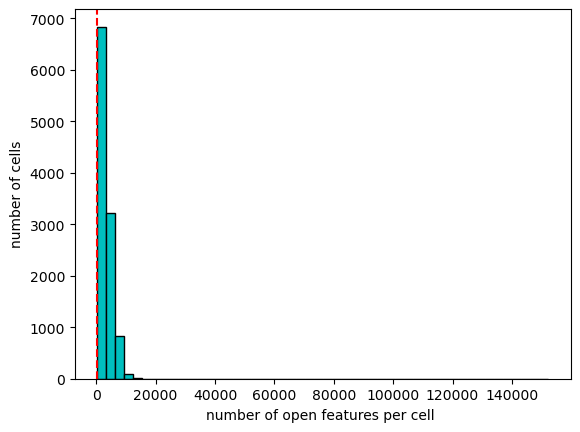

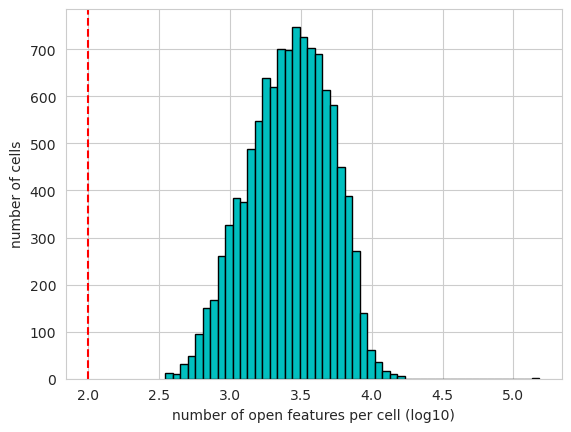


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



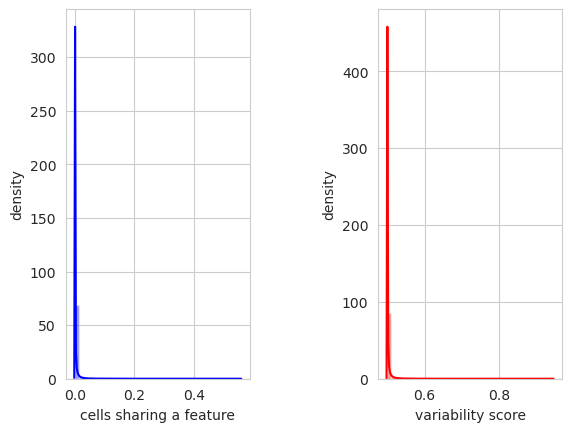

In [16]:
epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=100)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=100)

epi.pp.cal_var(adata)

In [17]:
epi.pp.filter_cells(adata, min_features=100)
epi.pp.filter_cells(adata, max_features=10000)

In [18]:
sc.pp.normalize_total(adata, exclude_highly_expressed=False, target_sum=None)
epi.pp.log1p(adata)

In [19]:
%%time
sc.pp.pca(adata, n_comps=50, use_highly_variable=False)

CPU times: user 5min 14s, sys: 9min 29s, total: 14min 44s
Wall time: 3min 55s


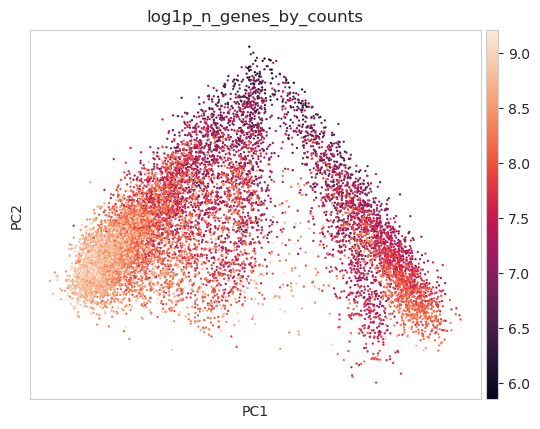

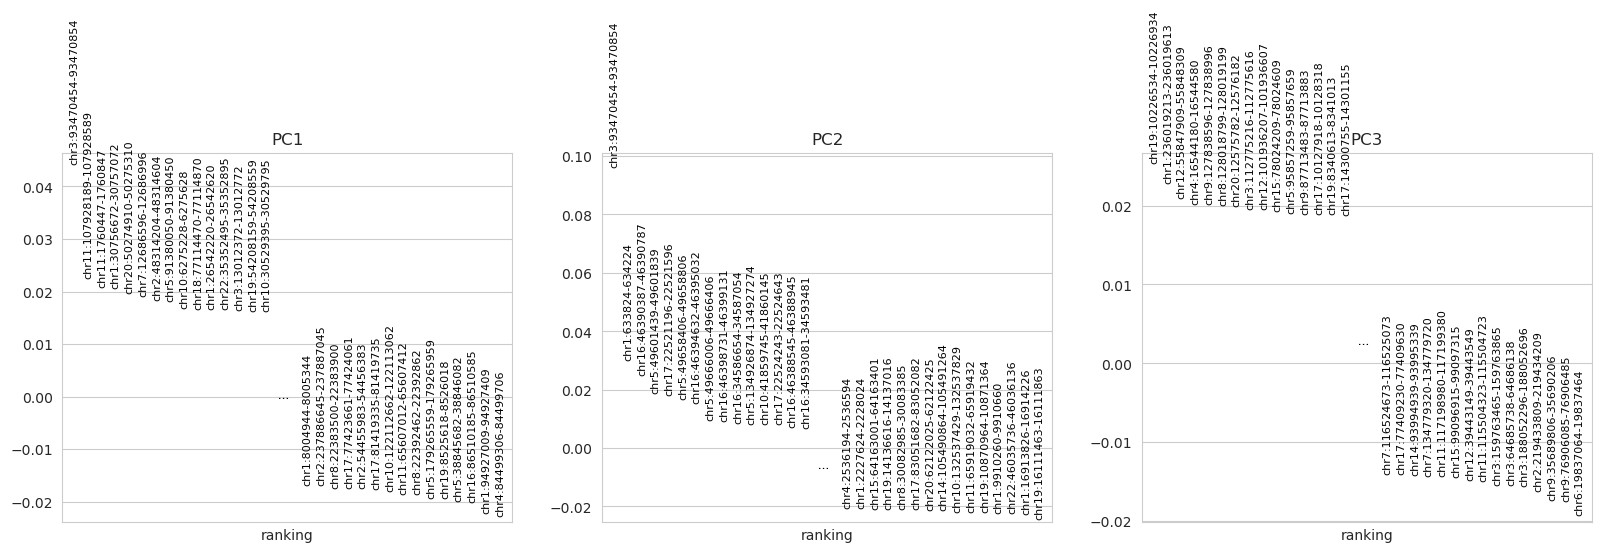

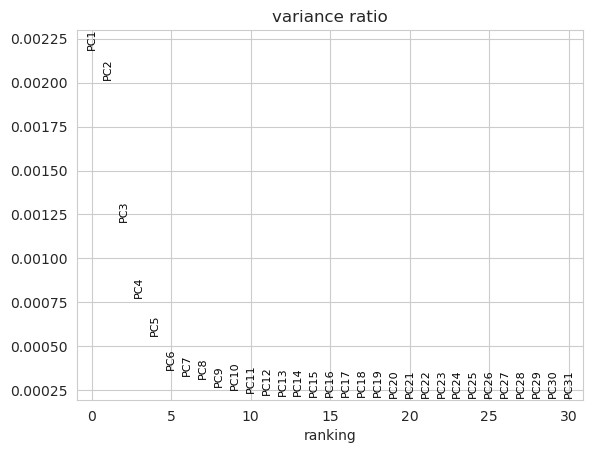

In [20]:
sc.pl.pca_overview(adata, color="log1p_n_genes_by_counts")

In [21]:
start = 1
n_pcs = 20
adata.obsm["X_pca"] = adata.obsm["X_pca"][:, start:n_pcs]
adata.varm["PCs"] = adata.varm["PCs"][:, start:n_pcs]

if "variance_ratio" in adata.uns.get("pca", {}):
    adata.uns["pca"]["variance_ratio"] = adata.uns["pca"]["variance_ratio"][start:n_pcs]

In [22]:
%%time
sc.pp.neighbors(adata, n_neighbors=15, method='umap', metric='euclidean')

CPU times: user 24.1 s, sys: 1.04 s, total: 25.2 s
Wall time: 23.4 s


In [23]:
%%time
sc.tl.umap(adata, min_dist=0.1, spread=2.5)

CPU times: user 8.99 s, sys: 1.19 s, total: 10.2 s
Wall time: 8.73 s


<Axes: title={'center': 'log1p_n_genes_by_counts'}, xlabel='UMAP1', ylabel='UMAP2'>

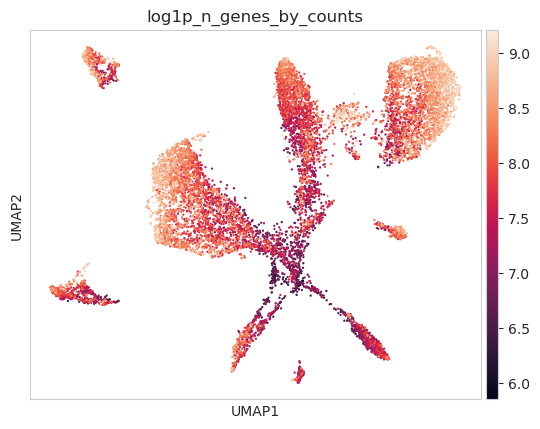

In [24]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color="log1p_n_genes_by_counts")

In [25]:
sc.tl.louvain(adata, resolution=0.6)

<Axes: title={'center': 'louvain'}, xlabel='UMAP1', ylabel='UMAP2'>

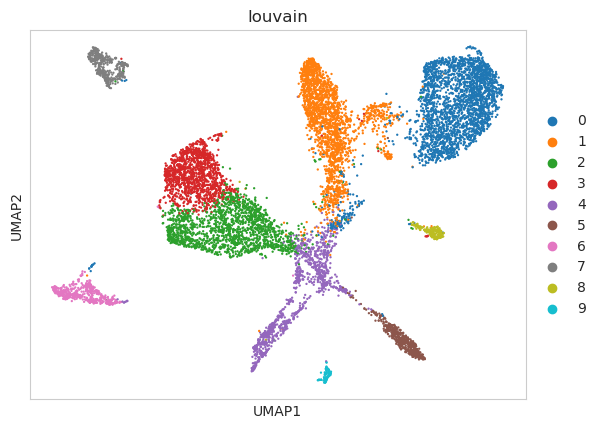

In [26]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color="louvain")

<Axes: title={'center': 'cell type'}, xlabel='UMAP1', ylabel='UMAP2'>

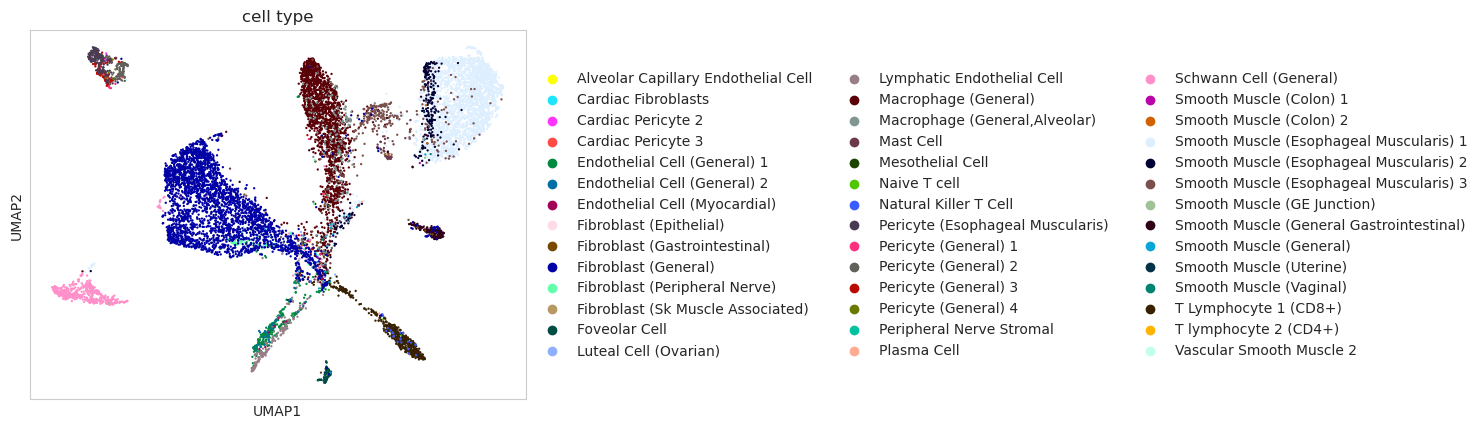

In [27]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color="cell type")

In [28]:
%%time
adata.write(
        out_file,
        compression="gzip")

CPU times: user 26.1 s, sys: 670 ms, total: 26.8 s
Wall time: 27.2 s


In [29]:
adata = adata[:, ~adata.var['gene_name'].isna()]

In [30]:
duplicated_genes = adata.var['gene_name'][adata.var['gene_name'].duplicated(keep=False)]

In [31]:
%%time
adata_csc = adata.X.tocsc()

CPU times: user 928 ms, sys: 160 ms, total: 1.09 s
Wall time: 1.09 s


In [32]:
%%time
merged_data_dict = {}
for gene in duplicated_genes.unique():
    cols = np.where(adata.var['gene_name'] == gene)[0]
    data_slice = adata_csc[:, cols]
    merged = data_slice.max(axis=1)
    merged_data_dict[gene] = merged

CPU times: user 37.9 s, sys: 150 ms, total: 38.1 s
Wall time: 38.1 s


In [33]:
%%time
non_duplicated_genes = adata.var['gene_name'][~adata.var['gene_name'].duplicated(keep=False)]
for gene in non_duplicated_genes:
    cols = np.where(adata.var['gene_name'] == gene)[0]
    data_slice = adata_csc[:, cols]
    merged_data_dict[gene] = data_slice

CPU times: user 2.85 s, sys: 9.23 ms, total: 2.86 s
Wall time: 2.86 s


In [34]:
merged_matrix = hstack([l for l in merged_data_dict.values()], format='csr')

In [37]:
adata_merged = ad.AnnData(X=merged_matrix, obs=adata.obs, obsm=adata.obsm, var=pd.DataFrame(index=merged_data_dict.keys()))

In [38]:
%%time
adata_merged.write(
        out_file_by_gene,
        compression="gzip")

CPU times: user 3.55 s, sys: 70.9 ms, total: 3.62 s
Wall time: 3.66 s


In [39]:
adata_merged

AnnData object with n_obs × n_vars = 10910 × 52277
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'cell type', 'nb_features', 'louvain'
    obsm: 'X_pca', 'X_umap'